# mini_project_2.ipynb

Group Members: Peter Bollhorn

This notebook presents my solution to Mini Project 2.

Tobias Thormod Birk Nielsen and I have discussed our mini projects 2 together.


In [1]:
import sys
sys.path.append("..")

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from reader import generic_reader
from plotter import histogram_plotter

## Task 1
First I load the Excel files into separate pandas data frames called `red_wine` and `white_wine`.

In [2]:
red_wine = generic_reader.read_excel_file_to_data_frame("wine-data/winequality-red.xlsx", skiprows=1)
white_wine = generic_reader.read_excel_file_to_data_frame("wine-data/winequality-white.xlsx", skiprows=1)

Next, I have a look at the two data frames. I see that they have identical column headers, and that there is 1599 rows in `red_wine` and 4898 rows in `white_wine`.

In [3]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Task 2
I check that there are no missing values in the two data frames, which there is not.

In [5]:
print(red_wine.isna().sum())
print("\n")
print(white_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Then I check that all values are numeric in the two data frames, which they are:

In [6]:
print(red_wine.map(np.isreal).all())
print("\n")
print(white_wine.map(np.isreal).all())

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


## Task 3
I add a "type" column to the two data frames with value either "red" or "white".

Then I concatenate the two data frames into a single data frame called `wine`.

In [7]:
red_wine.insert(0, "type", "red")
white_wine.insert(0, "type", "white")
wine = pd.concat([red_wine, white_wine], ignore_index=True)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Task 4
I have searched the web and found this journal article:
- Cortez et al. (2009) "Modeling wine preferences by data mining from physicochemical properties". Decision Support Systems, Volume 47, Issue 4, Pages 547-553. DOI: 10.1016/j.dss.2009.05.016

The article is available as Open Access here: https://findit.dtu.dk/en/catalog/539b649abb9401d5220228fd

And its dataset is available here: https://archive.ics.uci.edu/dataset/186/wine+quality

This article is interesting, because it works with the exact same dataset as this mini project.

The article and its dataset are included in this repo in the folder "cortez_et_al_2009".

## Task 5

(Cortez et al., 2009) explains that the dataset consists of 1599 red and 4898 white vinho verde samples from Portugal.

From the article I now know what the contents of the columns are:

| Column name          | Variable type            | Description                                         |
|----------------------|----------------------|-----------------------------------------------------|
| type                 | Categorical          | "red" or "white"                                    |
| fixed acidity        | Continuous number    | [g<sub>(tartaric acid)</sub>/dm<sup>3</sup>]        |
| volatile acidity     | Continuous number    | [g<sub>(acetic acid)</sub>/dm<sup>3</sup>]          |
| citric acid          | Continuous number    | [g/dm<sup>3</sup>]                                  |
| residual sugar       | Continuous number    | [g/dm<sup>3</sup>]                                  |
| chlorides            | Continuous number    | [g<sub>(sodium chloride)</sub>/dm<sup>3</sup>]      |
| free sulfur dioxide  | Continuous number    | [mg/dm<sup>3</sup>]                                 |
| total sulfur dioxide | Continuous number    | [mg/dm<sup>3</sup>]                                 |
| density              | Continuous number    | [g/cm<sup>3</sup>]                                  |
| pH                   | Continuous number    | [-]                                                 |
| sulphates            | Continuous number    | [g<sub>(potassium sulphate)</sub>/dm<sup>3</sup>]   |
| alcohol              | Continuous number    | [% vol.]                                            |
| quality              | Discrete number      | from 0 to 10                                        |

The 11 variables which are continuous numbers are all machine measured in physicochemical tests.

The quality is based on blind tests by a minimum of three human wine experts.
Each expert graded the wine quality between 0 (very bad) and 10 (excellent).
The median value is used as the final quality score for the wine sample.


**Independent variables**: I identify the type and the 11 physicochemical properties as the independent variables (the input).

**Dependent variable**: I identify the quality as assessed by the human wine experts as the dependent variable (the output).


## Task 6
Right now I do not find it necessary to transform the data

## Task 7
Here is the descriptive statistics of the numerical data in `red_wine`, `white_wine` and `wine`.

In [8]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Now I plot histograms for `red_wine` to see if the data is normally distributed:
- Volatile acidity, density and pH are approximately normally distributed.
- Fixed acidity, residual sugar, chlorides, total sulfur dioxide, sulphates and alcohol looks positively skewed (right skewed)

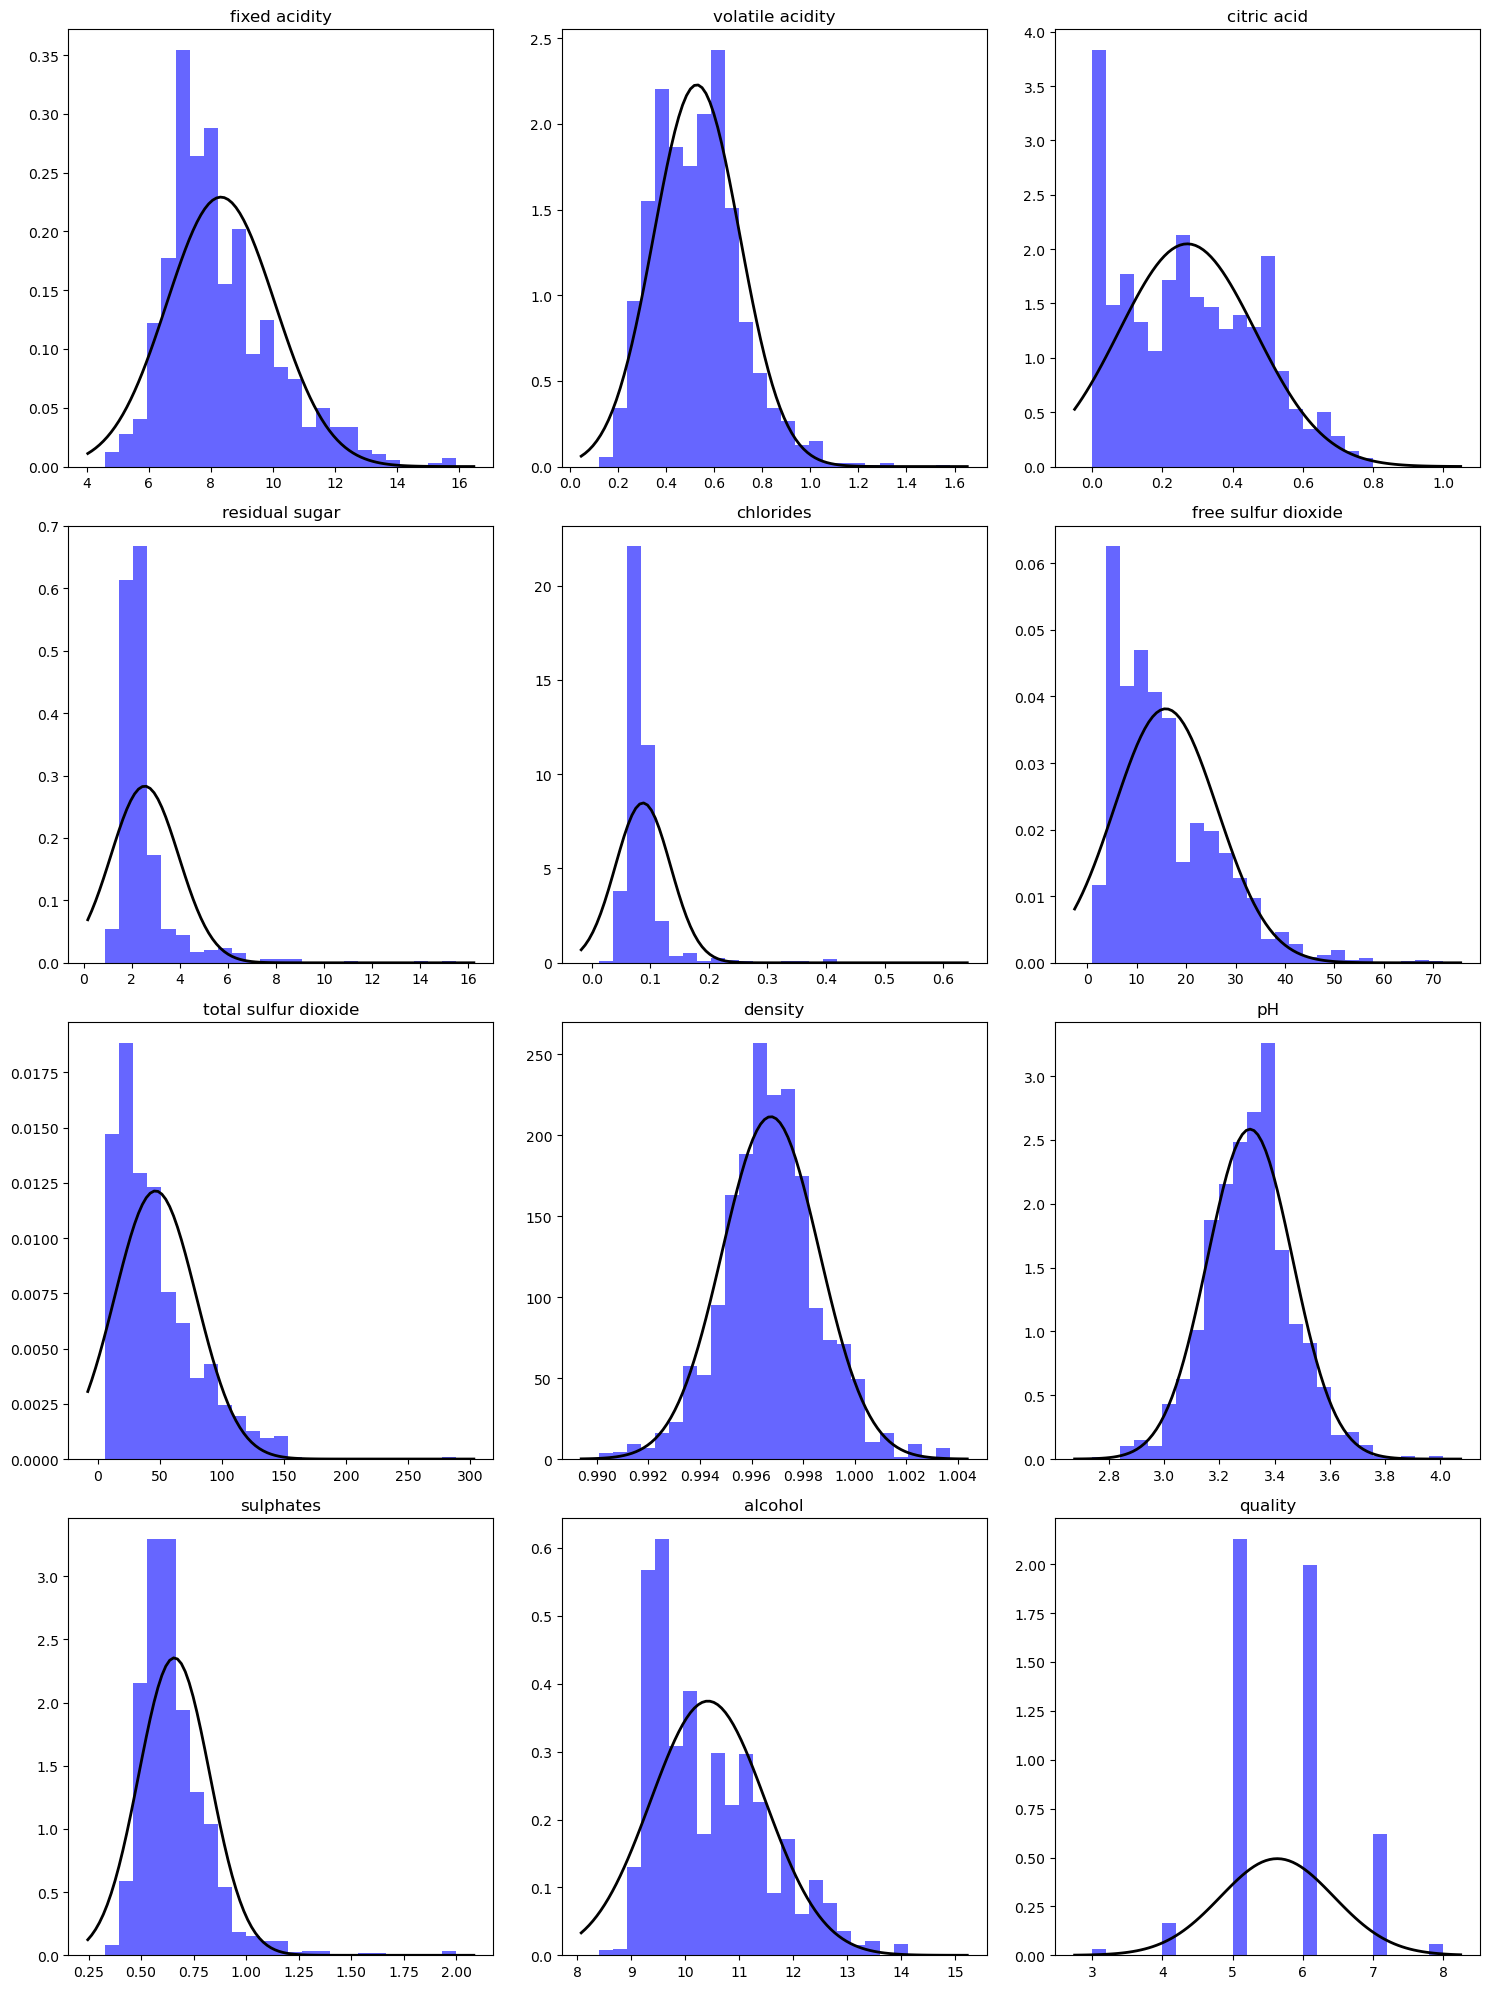

In [11]:
histogram_plotter.plot_histograms_for_data_frame(red_wine)

Now I also plot histograms for `white_wine` and `wine`.

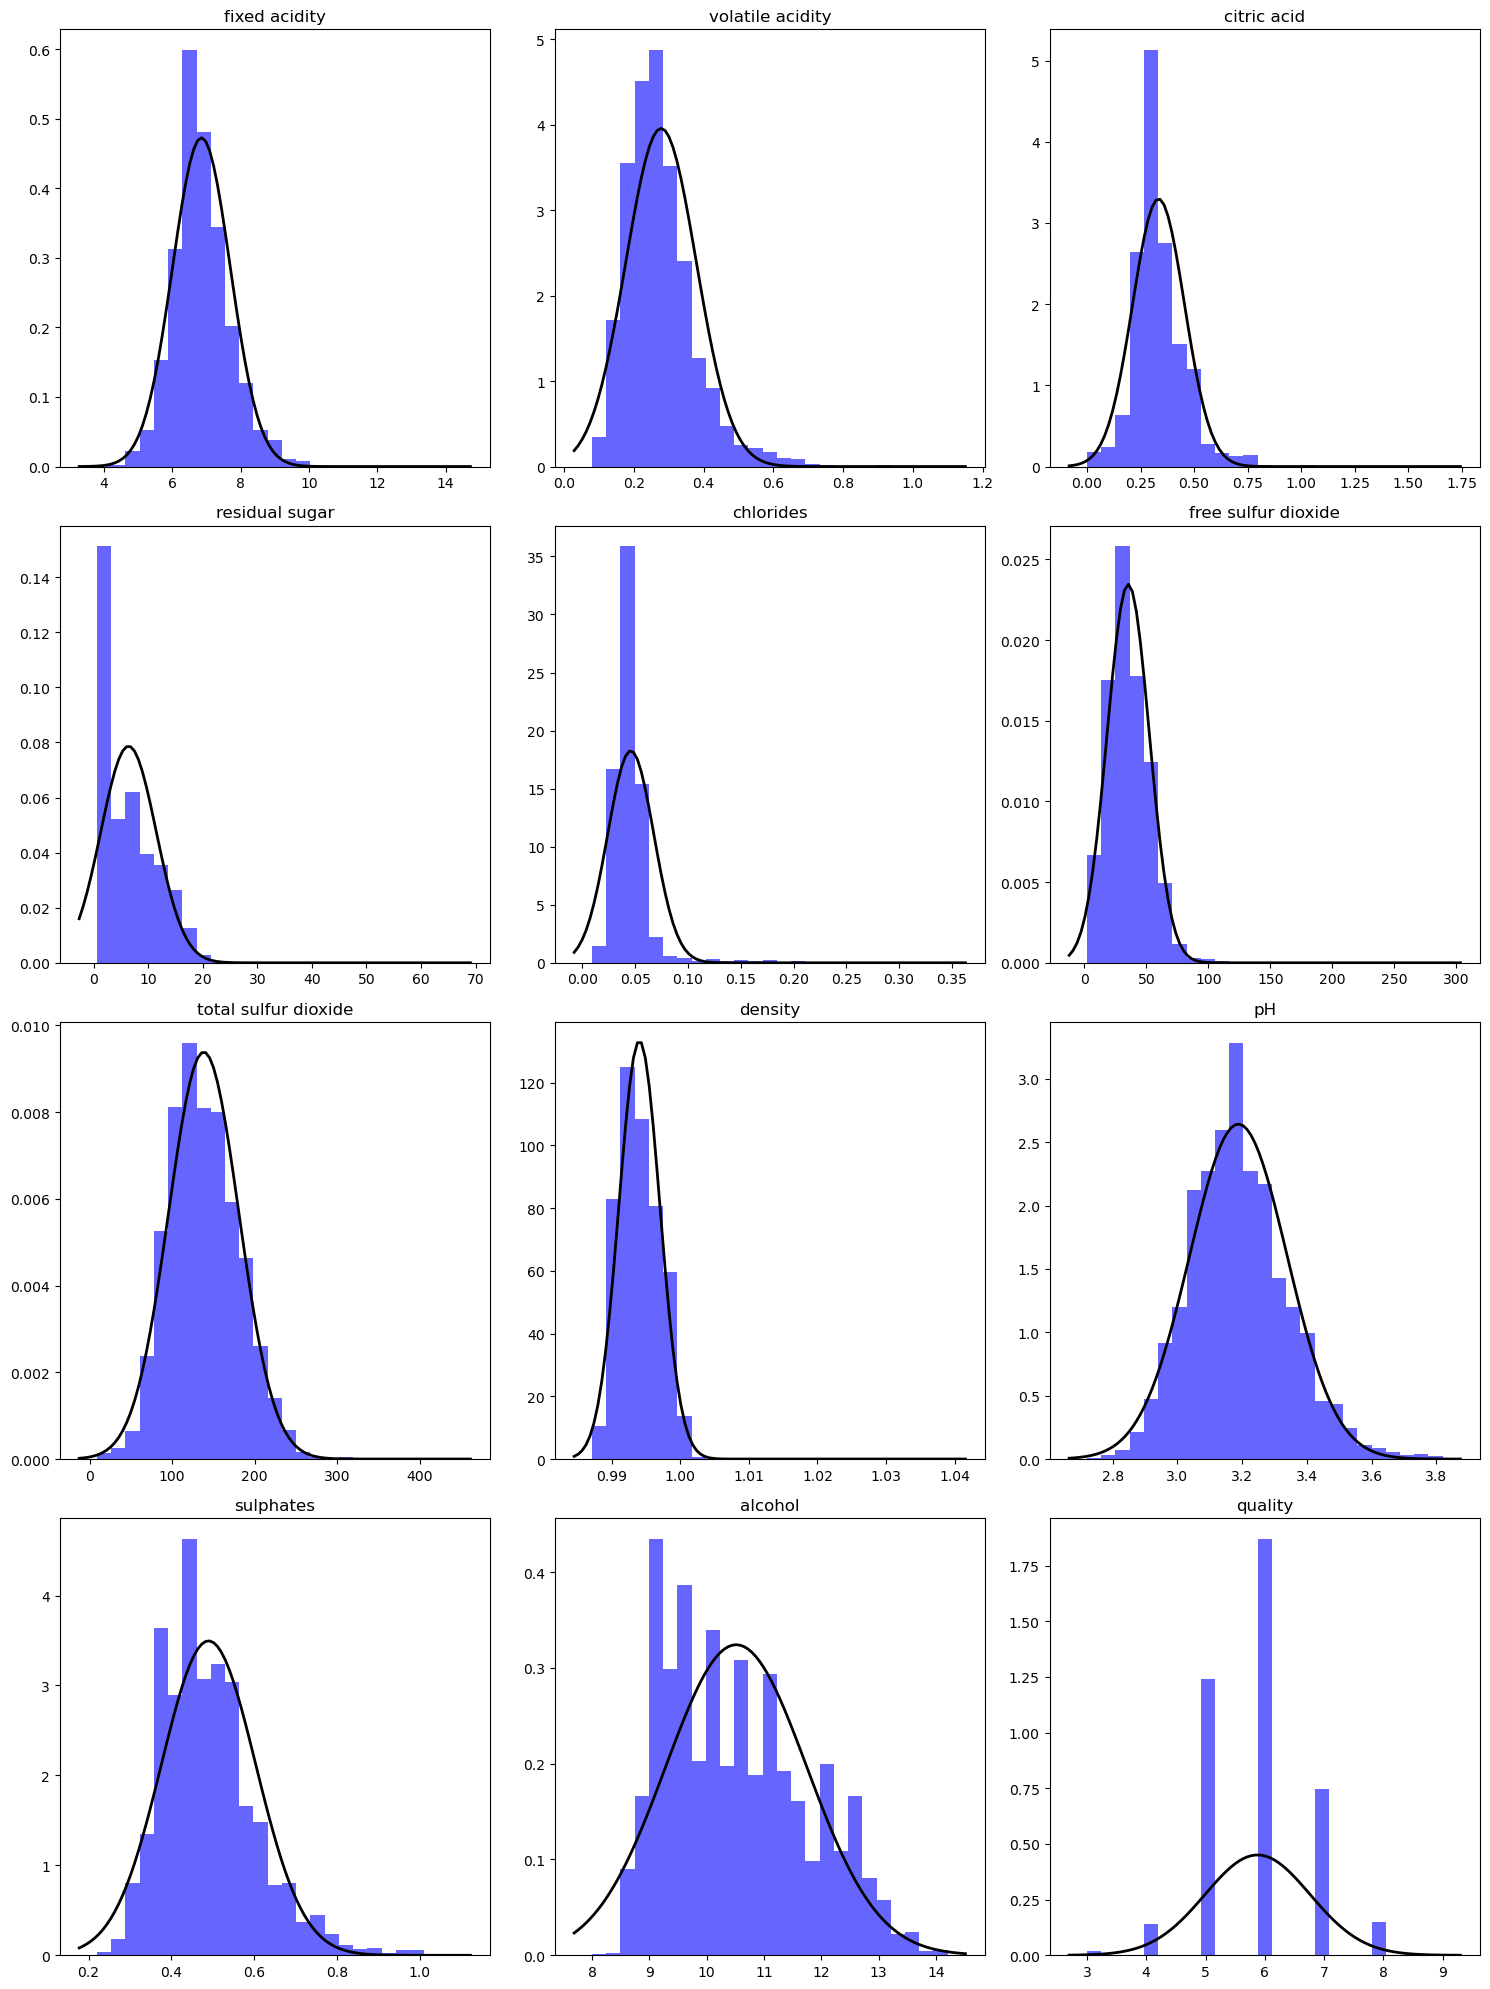

In [12]:
histogram_plotter.plot_histograms_for_data_frame(white_wine)

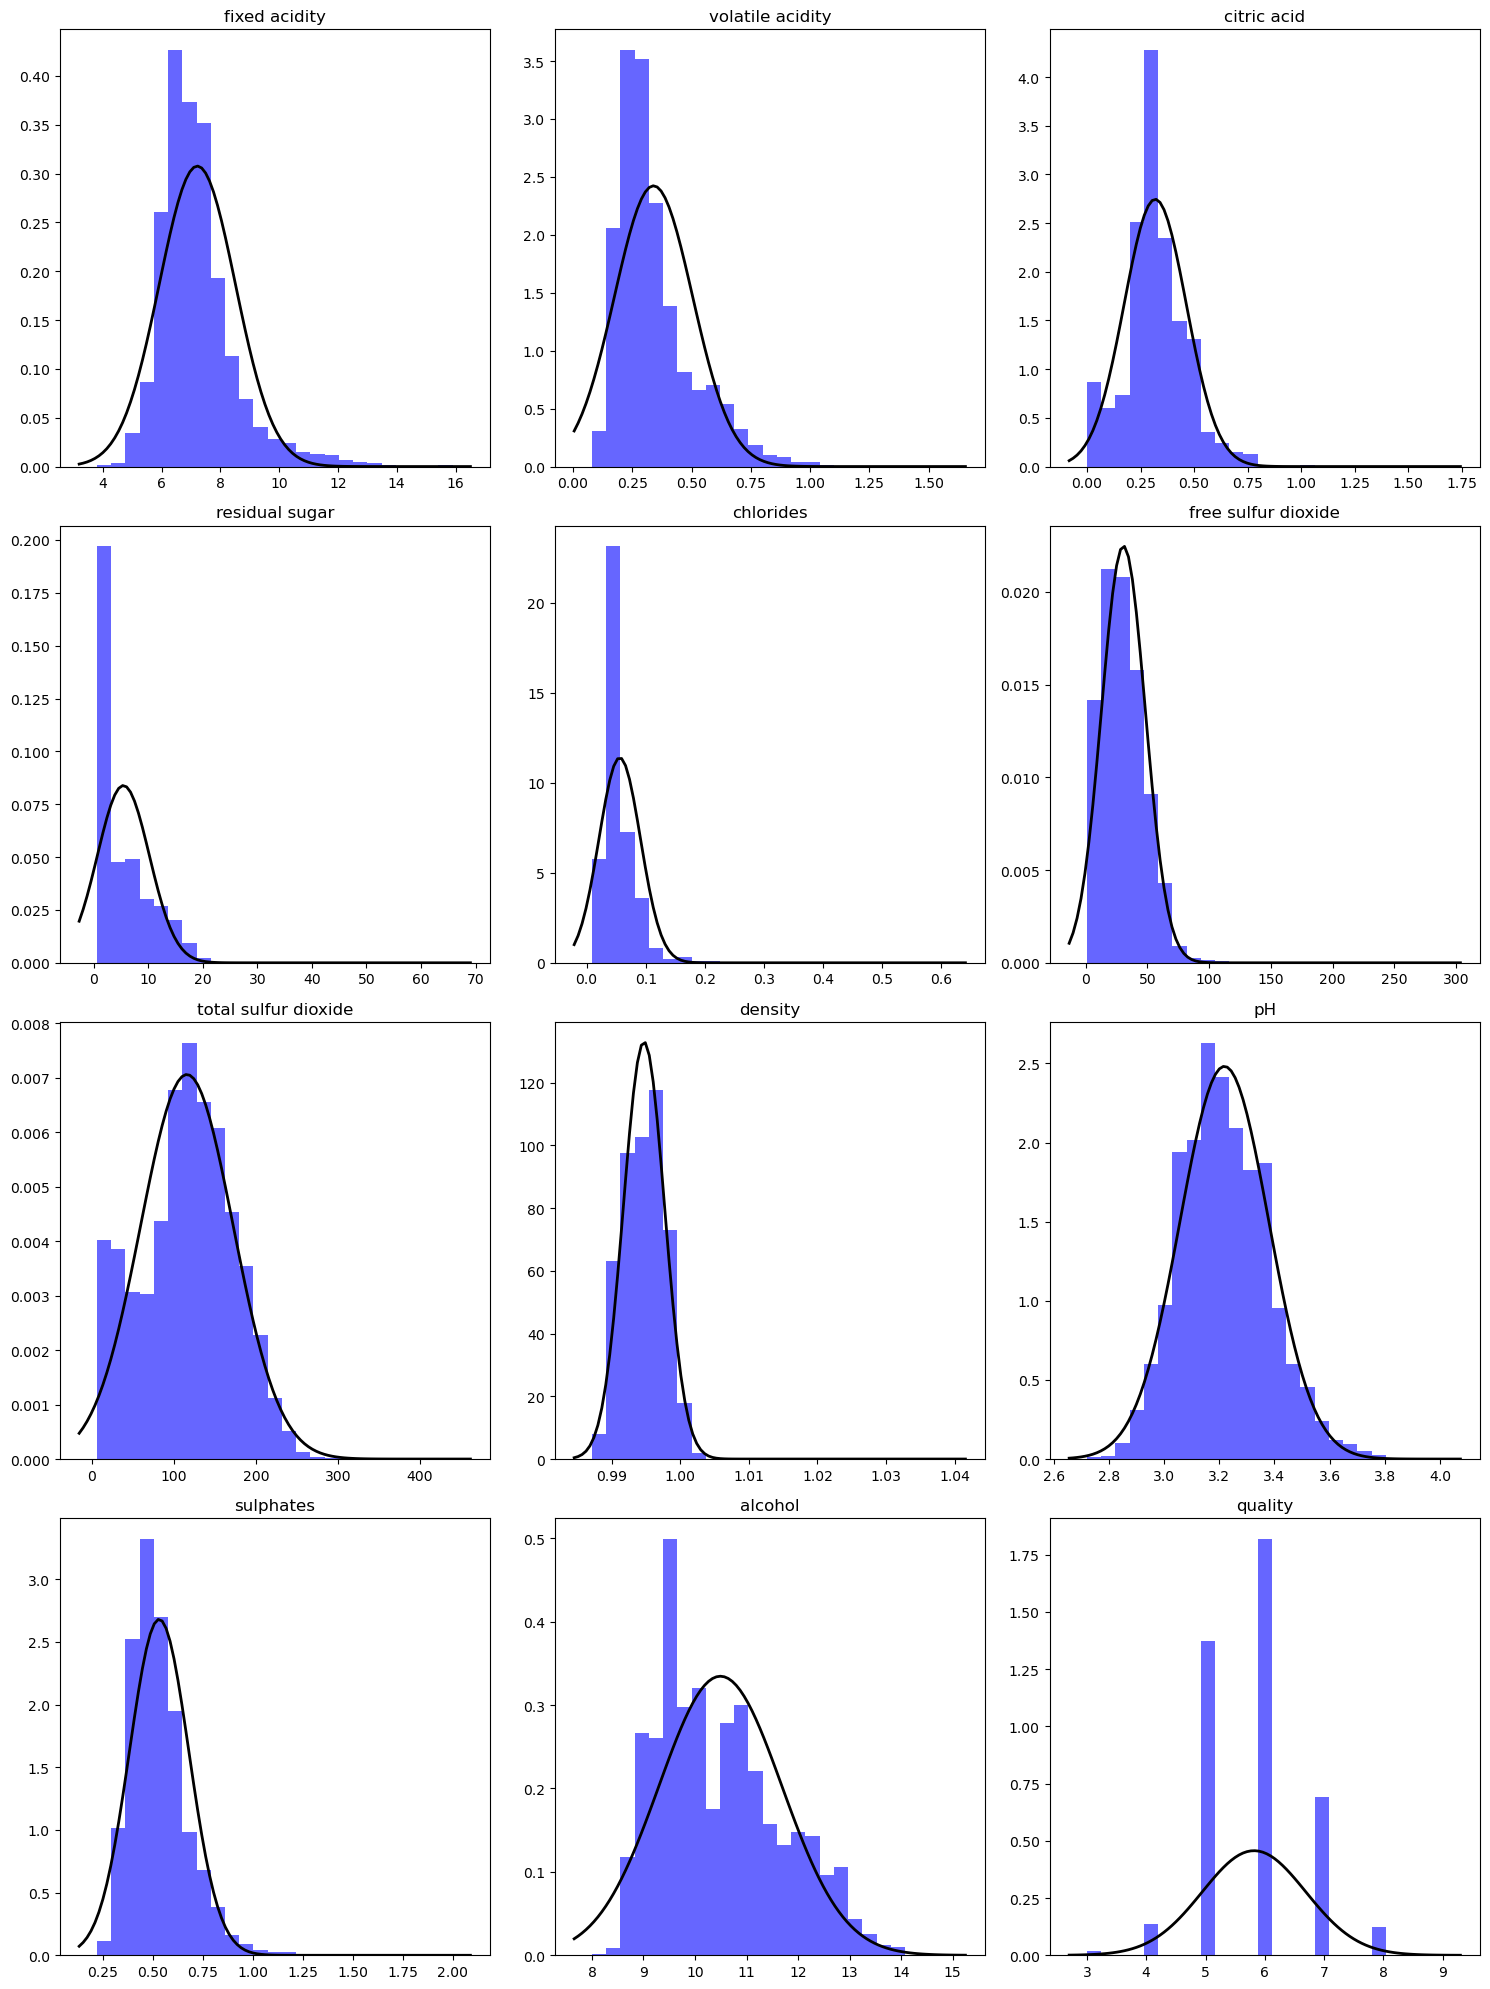

In [13]:
histogram_plotter.plot_histograms_for_data_frame(wine)

## Task 8

<Axes: xlabel='quality', ylabel='count'>

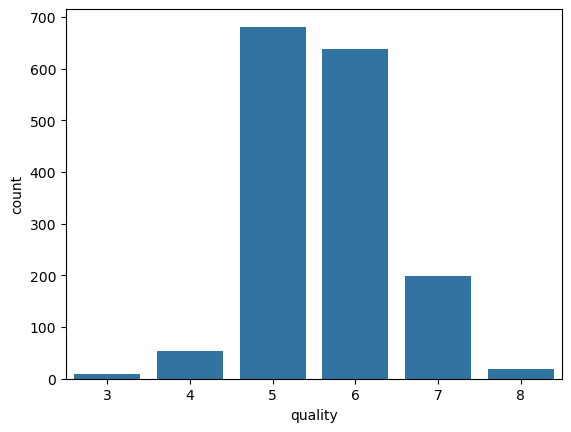

In [14]:
sb.countplot(x='quality', data=red_wine)

<Axes: xlabel='quality', ylabel='count'>

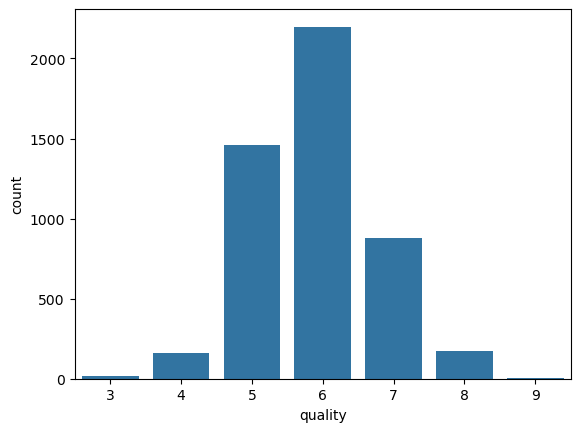

In [15]:
sb.countplot(x='quality', data=white_wine)

We see that white wine has a bit higher average quality than red wine.

In [16]:
red_wine_average_quality = red_wine['quality'].mean()
red_wine_average_quality

np.float64(5.6360225140712945)

In [17]:
white_wine_average_quality = white_wine['quality'].mean()
white_wine_average_quality

np.float64(5.87790935075541)

## Task 10

In [18]:
wine['pH_bin'] = pd.cut(wine['pH'], bins=5)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_bin
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,"(3.494, 3.752]"
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,"(2.978, 3.236]"
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,"(3.236, 3.494]"
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,"(2.978, 3.236]"
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,"(3.494, 3.752]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,"(3.236, 3.494]"
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,"(2.978, 3.236]"
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,"(2.978, 3.236]"
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,"(3.236, 3.494]"


In [19]:
# Group by the pH bins and calculate average density per bin
avg_density_per_bin = wine.groupby('pH_bin')['density'].mean()

print(avg_density_per_bin)

pH_bin
(2.719, 2.978]    0.994801
(2.978, 3.236]    0.994679
(3.236, 3.494]    0.994688
(3.494, 3.752]    0.994887
(3.752, 4.01]     0.993582
Name: density, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_10736\230228250.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_density_per_bin = wine.groupby('pH_bin')['density'].mean()


I see that all the densities are slightly smaller than the density for water (density for water is 1g/cm3)
I see that the pH bin "(3.494, 3.752]" has the highest density.



## Task 11

In [20]:
corr_matrix = red_wine.drop(columns=['type']).corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

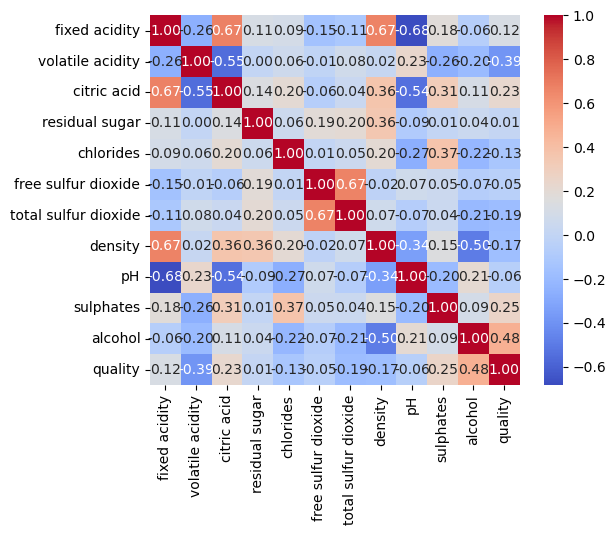

In [21]:
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

I see there is a negative correlation between fixed acidity and pH with R=-0.68
I make a scatter plot of these two parameters to explore the relationship further

<Axes: xlabel='fixed acidity', ylabel='pH'>

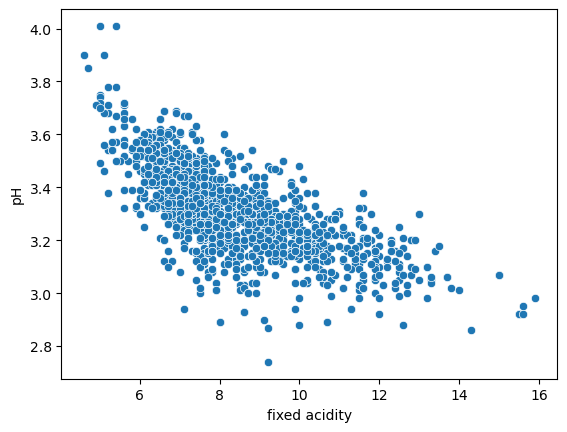

In [22]:
sb.scatterplot(x='fixed acidity', y='pH', data=red_wine)

Extra: Train a model on white wine

In [23]:
# the most important library for machine learning algorithms
from sklearn import datasets, svm, tree, preprocessing, metrics

In [24]:
white_wine['quality'] = white_wine['quality'] / 10
white_wine.drop('type', axis=1, inplace=True)
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0.6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0.6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0.6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.7


In [25]:
# Split the data into input (X) and output (y)
X = white_wine.drop("quality", axis=1).values
y = white_wine["quality"].values

In [26]:
X

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [27]:
y

array([0.6, 0.6, 0.6, ..., 0.6, 0.7, 0.6])

In [28]:
# Split the data into train and test sets
# 80% of the dataset will be used for training and 20% will be used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [29]:
# Select a method
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt

DecisionTreeClassifier(max_depth=3)

In [30]:
# Train a model
# dt.fit (X_train, y_train)

In [31]:
# Validate the model
# dt.score (X_test, y_test)

In [32]:
# Try another method
# import sklearn.ensemble as ske
# rf = ske.RandomForestClassifier(n_estimators=50)
# rf.fit (X_train, y_train)
# rf.score (X_test, y_test)

In [33]:
# Try another method
# import sklearn.ensemble as ske
# gb = ske.GradientBoostingClassifier(n_estimators=50)
# gb.fit (X_train, y_train)
# gb.score (X_test, y_test)

In [34]:
# Try combining methods
# import sklearn.ensemble as ske
# eclf = ske.VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])
# eclf.fit (X_train, y_train)
# eclf.score (X_test, y_test)

Test the model for prediction

In [35]:
# y_prediction = dt.predict(X_test)

In [36]:
# sb.scatterplot(x=y_test, y=y_prediction, alpha=0.3)
# plt.xlim(0, 10)
# plt.ylim(0, 10)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.plot([0, 10], [0, 10])


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

dt = DecisionTreeRegressor(max_depth=3)
rf = RandomForestRegressor(n_estimators=50)
gb = GradientBoostingRegressor(n_estimators=50)

# Fit with X_train, y_train
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predict with X_test
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [38]:
dt.score (X_test, y_test)

0.25463620049504665

In [39]:
rf.score (X_test, y_test)

0.505716662436906

In [40]:
gb.score(X_test, y_test)

0.3674464901491632

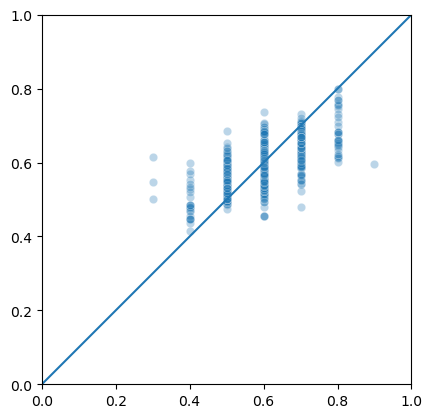

In [41]:
sb.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 1], [0, 1])